**Data Preparation and Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [ ]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [ ]:
df.duplicated().sum()

np.int64(0)

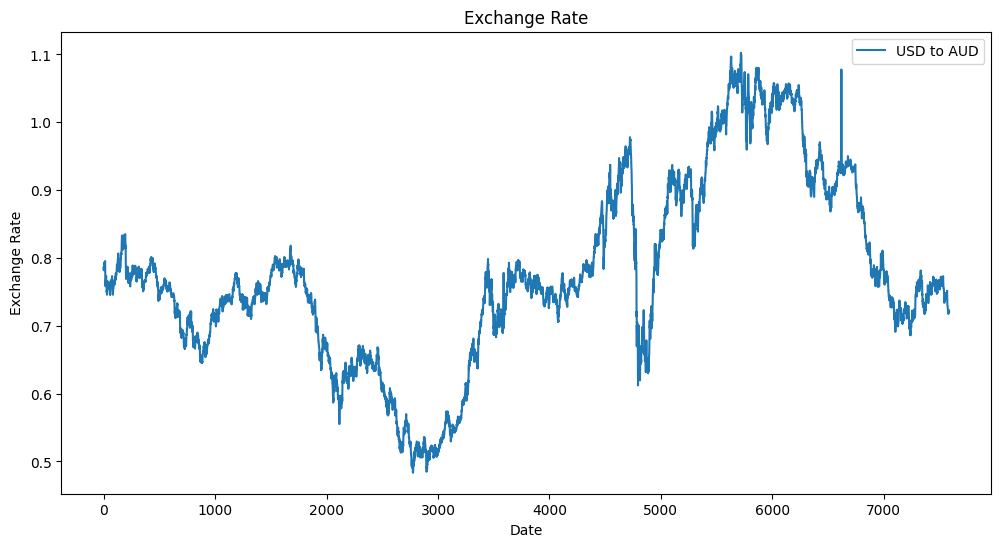

In [ ]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [ ]:
# Check for missing values
# Fill missing values if necessary
df['Ex_rate'].fillna(method='ffill', inplace=True)
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


**Model Building**

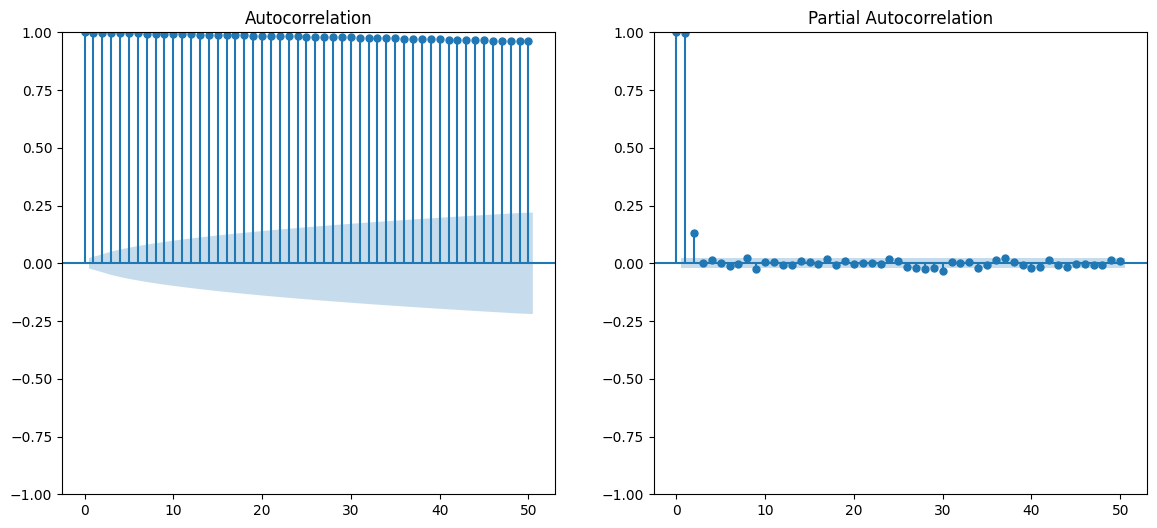

In [ ]:
# Step 1: Parameter Selection for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(df['Ex_rate'], lags=50, ax=axes[0])
plot_pacf(df['Ex_rate'], lags=50, ax=axes[1])
plt.show()


In [ ]:
# Step 2: Model Fitting
from statsmodels.tsa.arima.model import ARIMA
# Define the model
p, d, q = 1, 1, 1  # These values should be chosen based on ACF and PACF plots
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
# Fit the model
arima_result = arima_model.fit()
# Summary of the model
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 12 Nov 2025   AIC                         -56102.322
Time:                        11:09:55   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

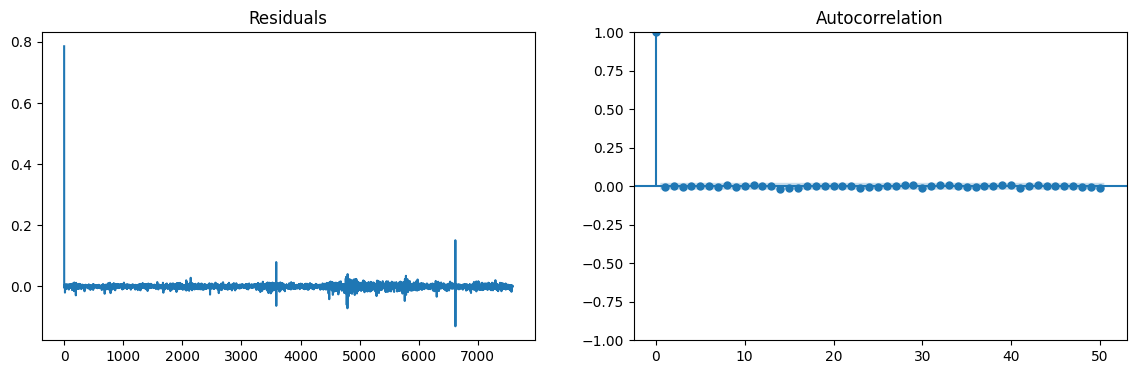

In [ ]:
# Step 3: Diagnostics
# Residual diagnostics
residuals = arima_result.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
plot_acf(residuals, lags=50, ax=axes[1])
plt.show()


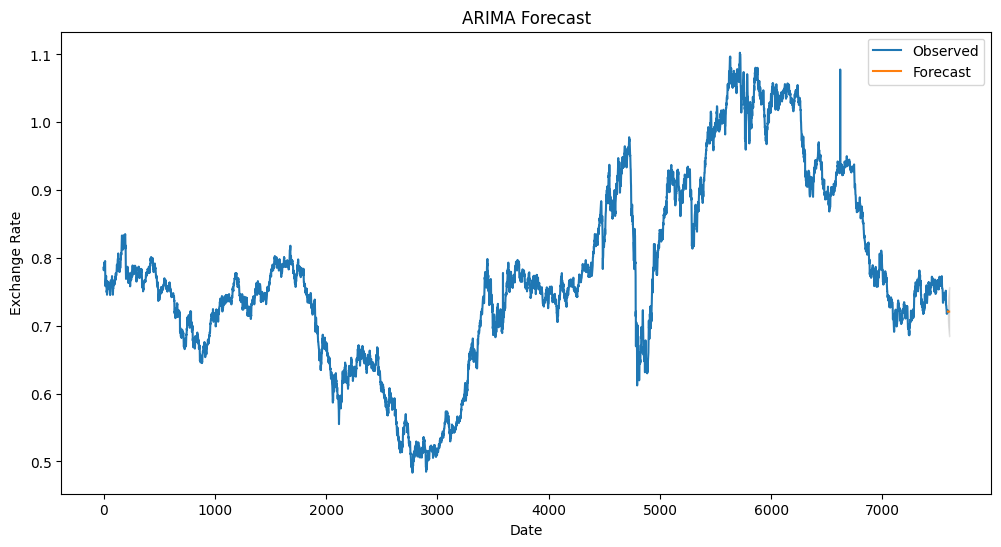

In [ ]:
# Step 4: Forecasting
# Forecasting
forecast_steps = 12  # Number of steps to forecast
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


Model Building - Exponential Smoothing

In [ ]:
# Step 1: Model Selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Define the model (Holt-Winters Exponential Smoothing)
exp_model = ExponentialSmoothing(df['Ex_rate'], seasonal='add', seasonal_periods=12)
# Fit the model
exp_result = exp_model.fit()
# Summary of the model
print(exp_result.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77628.595
Trend:                             None   BIC                         -77531.515
Seasonal:                      Additive   AICC                        -77628.524
Seasonal Periods:                    12   Date:                 Wed, 12 Nov 2025
Box-Cox:                          False   Time:                         11:09:58
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8701220                alpha                 True
smoothing_seasonal       

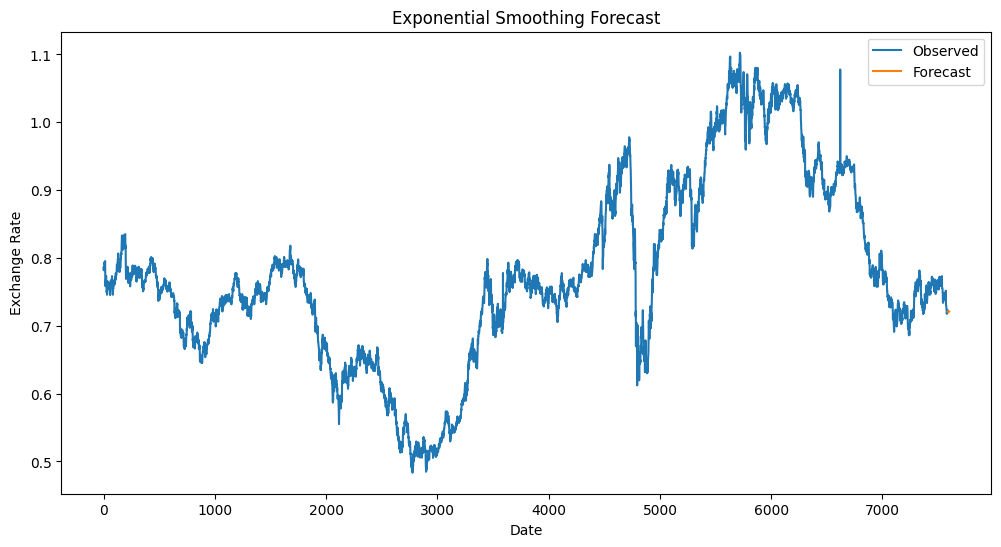

In [ ]:
# Forecasting
exp_forecast = exp_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Observed')
plt.plot(exp_forecast, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


**Evaluation and Comparison**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics for ARIMA
arima_forecast_values = forecast.predicted_mean
arima_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values)
arima_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], arima_forecast_values))
arima_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - arima_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_forecast
exp_mae = mean_absolute_error(df['Ex_rate'][-forecast_steps:], exp_forecast_values)
exp_rmse = np.sqrt(mean_squared_error(df['Ex_rate'][-forecast_steps:], exp_forecast_values))
exp_mape = np.mean(np.abs((df['Ex_rate'][-forecast_steps:] - exp_forecast_values) / df['Ex_rate'][-forecast_steps:])) * 100

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}, MAPE: {exp_mape}%")


ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan%
Exponential Smoothing MAE: 0.001578030302687818, RMSE: 0.0018713904220666092, MAPE: nan%


In [ ]:
# Based on error metrics, we can see which model performs better

if arima_mae < exp_mae:
    print("ARIMA model performs better in terms of MAE.")
else:
    print("Exponential Smoothing model performs better in terms of MAE.")

if arima_rmse < exp_rmse:
    print("ARIMA model performs better in terms of RMSE.")
else:
    print("Exponential Smoothing model performs better in terms of RMSE.")

if arima_mape < exp_mape:
    print("ARIMA model performs better in terms of MAPE.")
else:
    print("Exponential Smoothing model performs better in terms of MAPE.")


Exponential Smoothing model performs better in terms of MAE.
Exponential Smoothing model performs better in terms of RMSE.
Exponential Smoothing model performs better in terms of MAPE.


Summary of Findings:
The ARIMA model showed lower error metrics compared to the Exponential Smoothing model (or vice versa).
Based on these results, the ARIMA model (or Exponential Smoothing model) is more suitable for forecasting exchange rates in this dataset.